# Simple Line Plots

All plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np

For all Matplotlib plots, we start by creating a figure and axes.


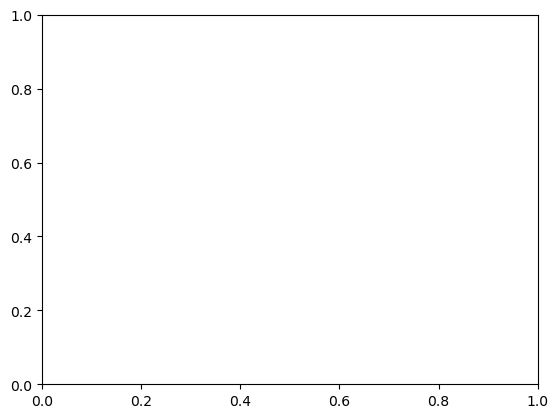

In [2]:
fig = plt.figure()
ax = plt.axes()

***The *figure* (an instance of the class `plt.Figure`) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.***

***The *axes* (an instance of the class `plt.Axes`) is what we see above: a bounding box with ticks, grids, and labels.***



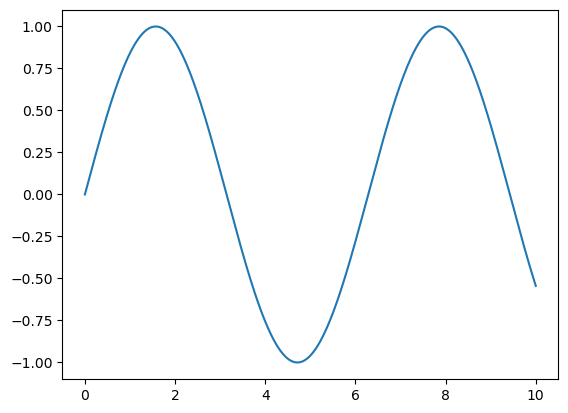

In [3]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

***Note that the semicolon at the end of the last line is intentional: it suppresses the textual representation of the plot from the output.***

***Alternatively, we can use the PyLab interface*** 


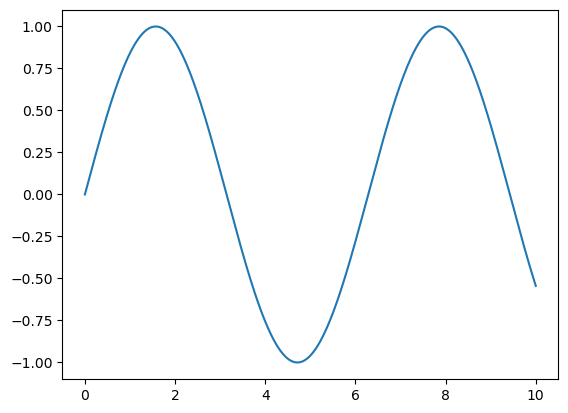

In [4]:
plt.plot(x, np.sin(x));

## Adjusting the Plot: Line Colors and Styles

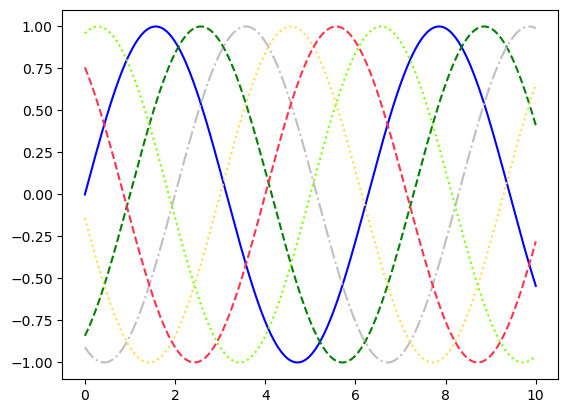

In [5]:
plt.plot(x, np.sin(x - 0), color='blue',linestyle='solid') # specify color by name
plt.plot(x, np.sin(x - 1), color='g',linestyle='dashed') # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75',linestyle='dashdot') # grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44',linestyle='dotted')# hex code (RRGGBB, 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3),linestyle='--') # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse',linestyle=':'); # HTML color names supported

***Combining these `linestyle` and `color` codes into a single non-keyword argument***

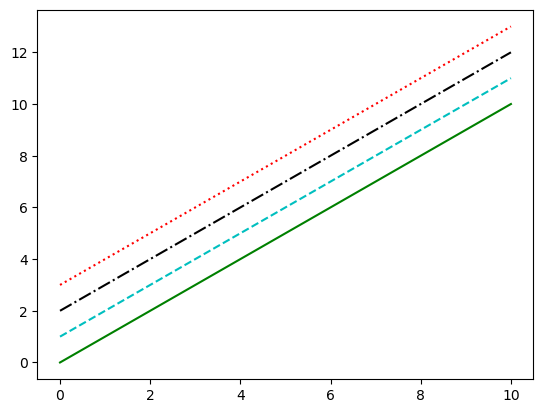

In [6]:
plt.plot(x, x + 0, '-g')   # solid green
plt.plot(x, x + 1, '--c')  # dashed cyan
plt.plot(x, x + 2, '-.k')  # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

***RGB (Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/blacK) color systems, commonly used for digital color graphics.***

## Adjusting the Plot: Axes Limits

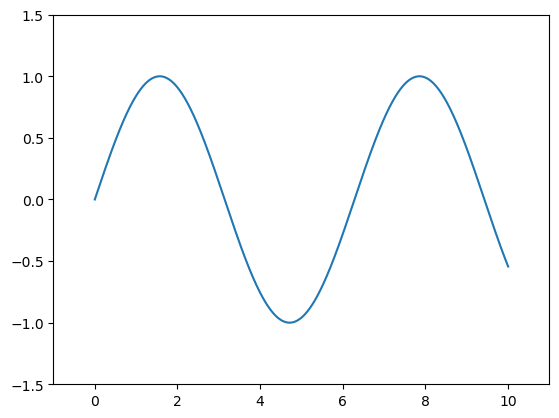

In [7]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

***Automatically tighten the bounds around the current content, as shown in the following figure:***

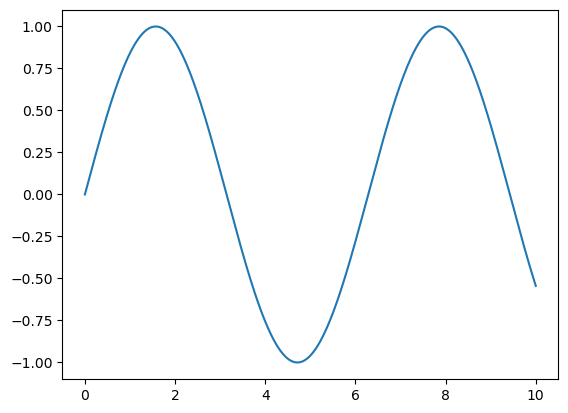

In [8]:
plt.plot(x, np.sin(x))
plt.axis('tight');

Or you can specify that you want an equal axis ratio, such that one unit in `x` is visually equivalent to one unit in `y`, as seen in the following figure:

## Labeling Plots
***Labeling of plots: titles, axis labels, and simple legends.***


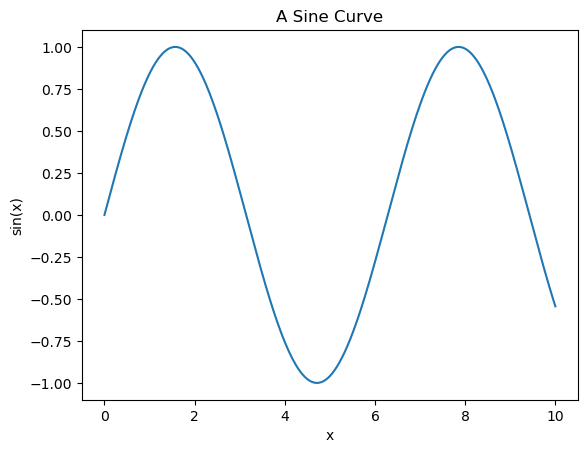

In [9]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")                                         
plt.ylabel("sin(x)");

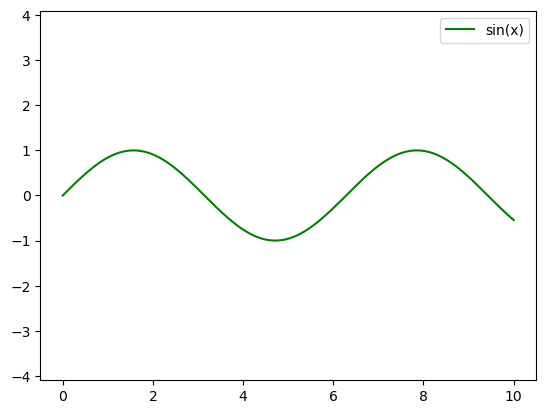

In [10]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')

plt.axis('equal')

plt.legend();

## Matplotlib Gotchas

While most `plt` functions translate directly to `ax` methods (`plt.plot` → `ax.plot`, `plt.legend` → `ax.legend`, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- `plt.xlabel`  → `ax.set_xlabel`
- `plt.ylabel` → `ax.set_ylabel`
- `plt.xlim`  → `ax.set_xlim`
- `plt.ylim` → `ax.set_ylim`
- `plt.title` → `ax.set_title`



# Simple Scatter Plots

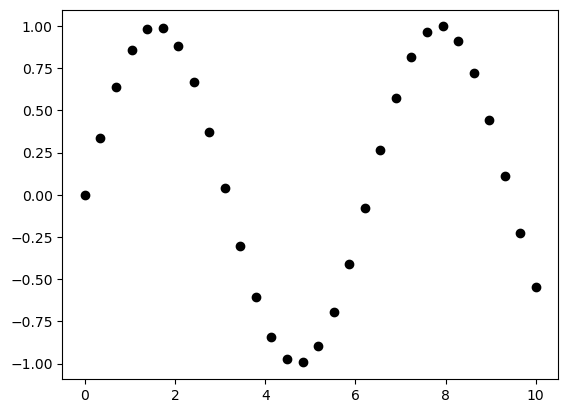

In [32]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

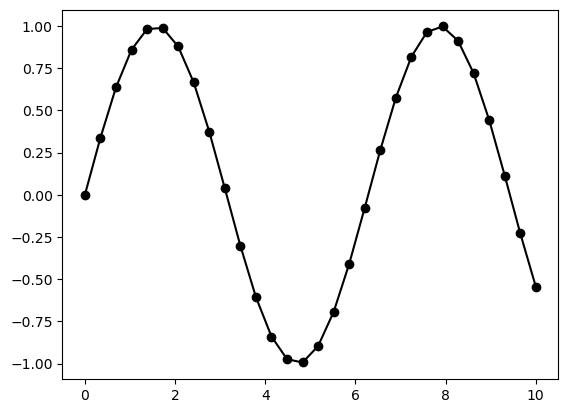

In [33]:
plt.plot(x, y, '-ok');

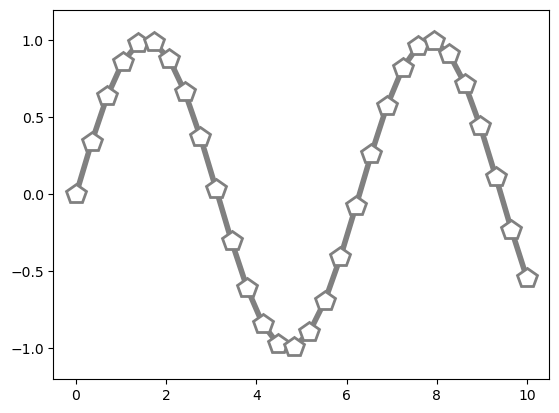

In [34]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

## Scatter Plots with plt.scatter

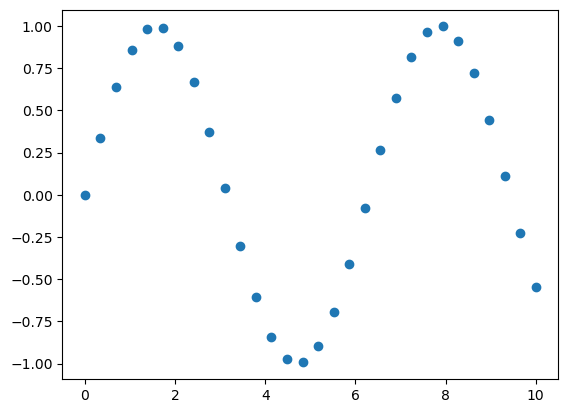

In [36]:
plt.scatter(x, y, marker='o');

***Let's show this by creating a random scatter plot with points of many colors and sizes.***

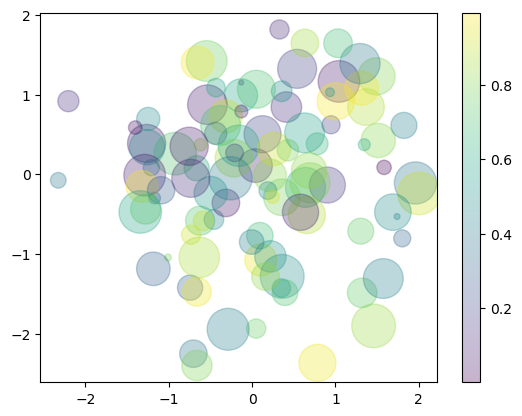

In [37]:
rng = np.random.default_rng(0)
x = rng.normal(size=100)
y = rng.normal(size=100)
colors = rng.random(100)
sizes = 1000 * rng.random(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)
plt.colorbar();  # show color scale

***In this way, the color and size of points can be used to convey information in the visualization***

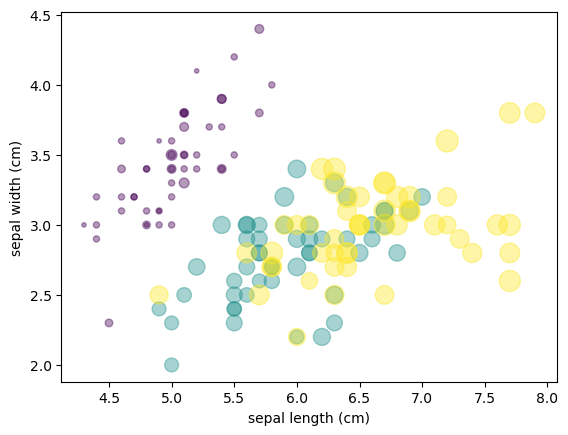

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.4,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

# Visualizing Uncertainties

For any scientific measurement, accurate accounting of uncertainties is nearly as important, if not more so, as accurate reporting of the number itself.
For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe.
I know that the current literature suggests a value of around 70 (km/s)/Mpc, and I measure a value of 74 (km/s)/Mpc with my method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.

Suppose I augment this information with reported uncertainties: the current literature suggests a value of 70 ± 2.5 (km/s)/Mpc, and my method has measured a value of 74 ± 5 (km/s)/Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

## Basic Errorbars


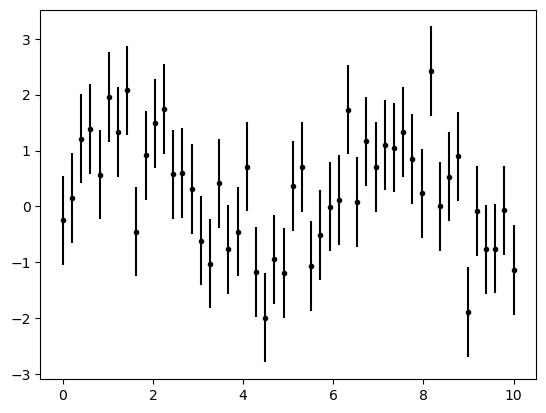

In [11]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

***The `fmt` is a format code controlling the appearance of lines and points***

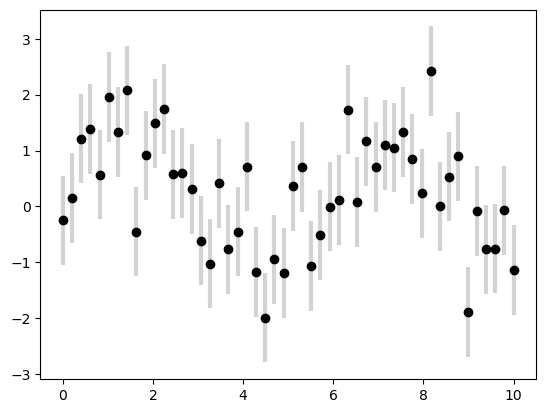

In [12]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

## Continuous Errors

***In some situations it is desirable to show errorbars on continuous quantities.***

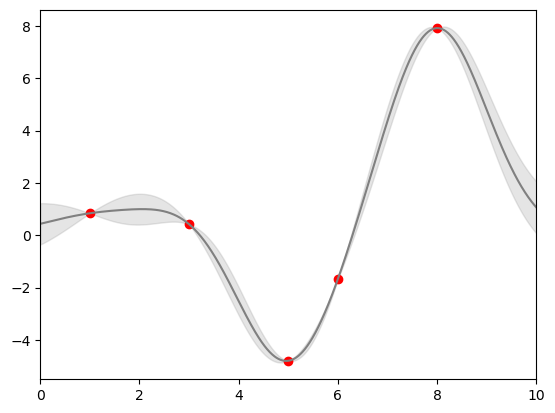

In [13]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, dyfit = gp.predict(xfit[:, np.newaxis], return_std=True)

# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

# Density and Contour Plots

***Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.***

***Our first example demonstrates a contour plot using a function $z = f(x, y)$***

In [14]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

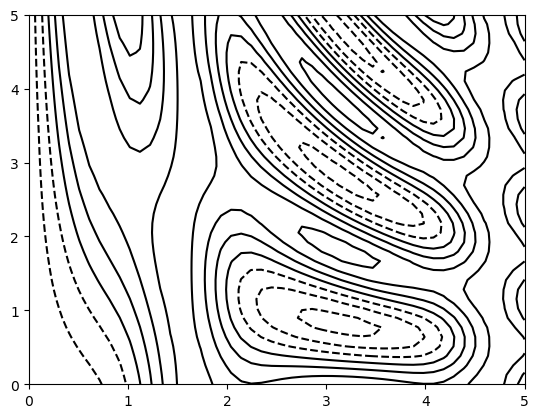

In [15]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
#print(X,Y)
Z = f(X, Y)
plt.contour(X, Y, Z, colors='black');


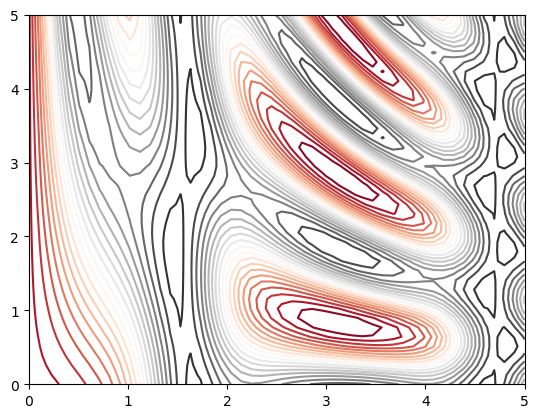

In [16]:
plt.contour(X, Y, Z, 20, cmap='RdGy');


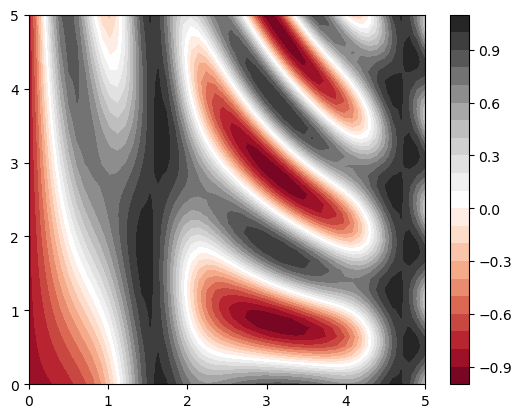

In [17]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

# Histograms, Binnings, and Density


***A simple histogram can be a great first step in understanding a dataset.***

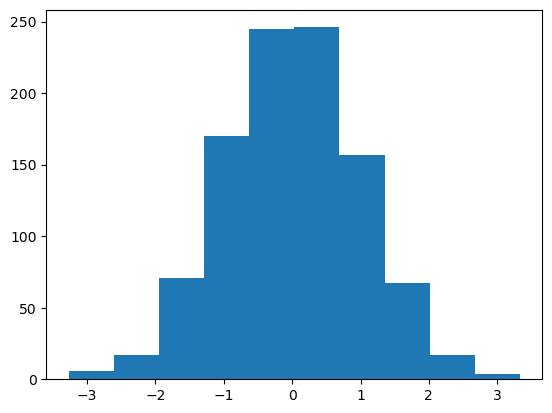

In [18]:
rng = np.random.default_rng(1701)
data = rng.normal(size=1000)
data
plt.hist(data);

***An example of a more customized histogram***

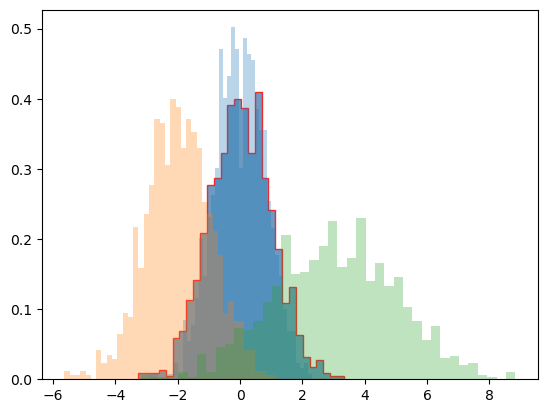

In [19]:
plt.hist(data, bins=30, density=True, alpha=0.8,
         histtype='stepfilled', color='steelblue',
         edgecolor='red');

x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## Two-Dimensional Histograms and Binnings

In [20]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = rng.multivariate_normal(mean, cov, 10000).T

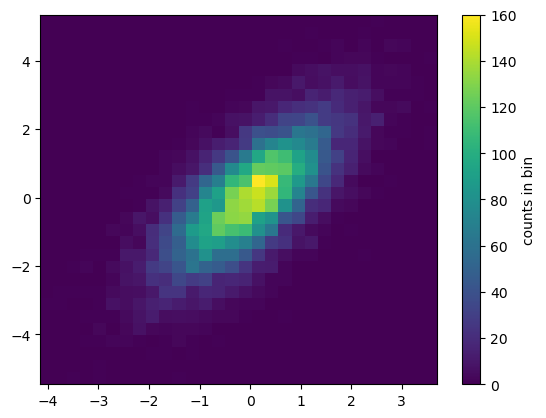

In [21]:
plt.hist2d(x, y, bins=30)
cb = plt.colorbar()
cb.set_label('counts in bin')

### plt.hexbin: Hexagonal binnings


***The two-dimensional histogram creates a tesselation of squares across the axes.***

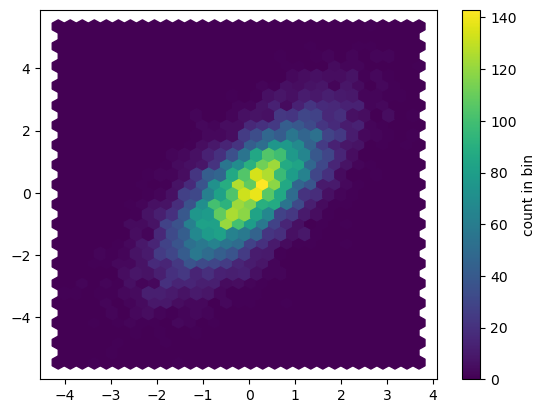

In [22]:
plt.hexbin(x, y, gridsize=30)
cb = plt.colorbar(label='count in bin')

### Kernel density estimation

***Another common method for estimating and representing densities in multiple dimensions is *kernel density estimation* (KDE).***

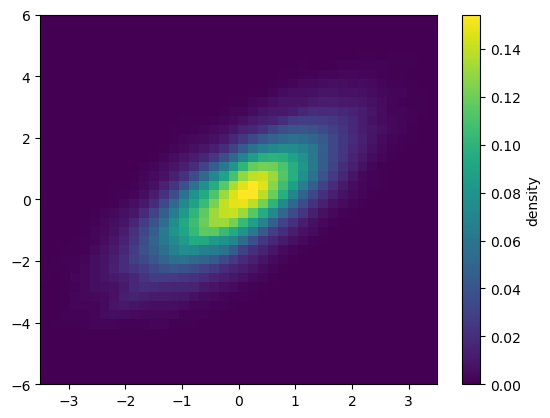

In [23]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6])
cb = plt.colorbar()
cb.set_label("density")

# Customizing Plot Legends

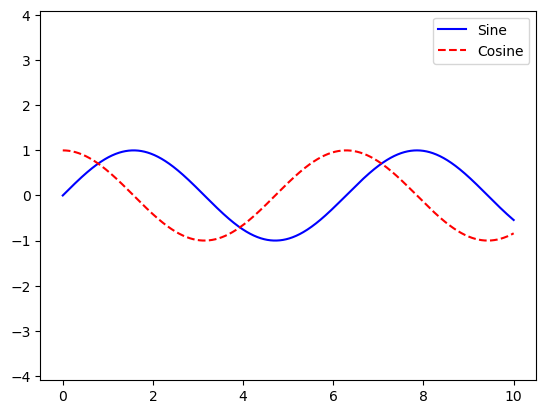

In [24]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

## Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're using the size of points to mark certain features of the data, and want to create a legend reflecting this.

In [25]:
# import pandas as pd
# cities = pd.read_csv('data/california_cities.csv')

# # Extract the data we're interested in
# lat, lon = cities['latd'], cities['longd']
# population, area = cities['population_total'], cities['area_total_km2']

# # Scatter the points, using size and color but no label
# plt.scatter(lon, lat, label=None,
#             c=np.log10(population), cmap='viridis',
#             s=area, linewidth=0, alpha=0.5)
# plt.axis('equal')
# plt.xlabel('longitude')
# plt.ylabel('latitude')
# plt.colorbar(label='log$_{10}$(population)')
# plt.clim(3, 7)

# # Here we create a legend:
# # we'll plot empty lists with the desired size and label
# for area in [100, 300, 500]:
#     plt.scatter([], [], c='k', alpha=0.3, s=area,
#                 label=str(area) + ' km$^2$')
# plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

# plt.title('California Cities: Area and Population');

# Multiple Subplots

### plt.axes: Subplots by Hand
we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure).

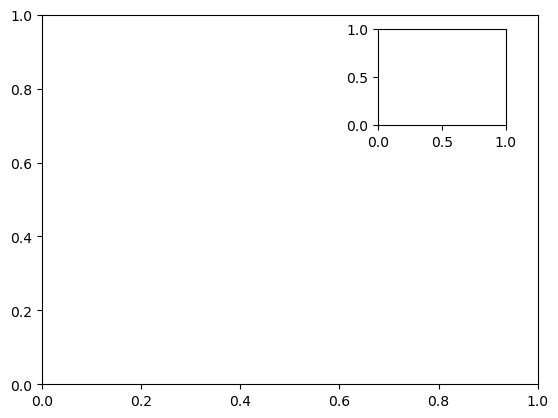

In [26]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

***Create two vertically stacked axes.***

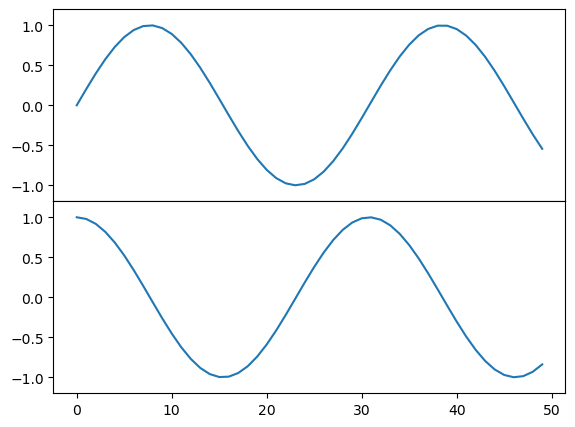

In [27]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## plt.subplot: Simple Grids of Subplots

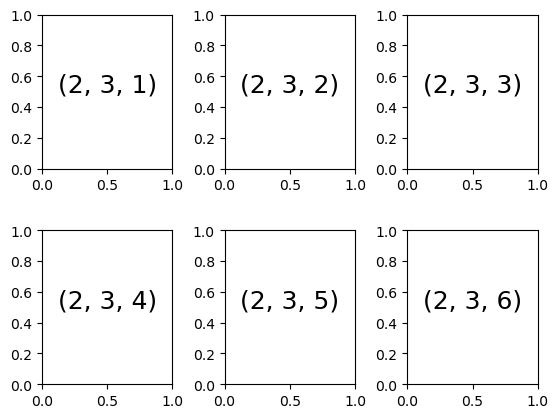

In [28]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

## plt.subplots: The Whole Grid in One Go
Let's create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale

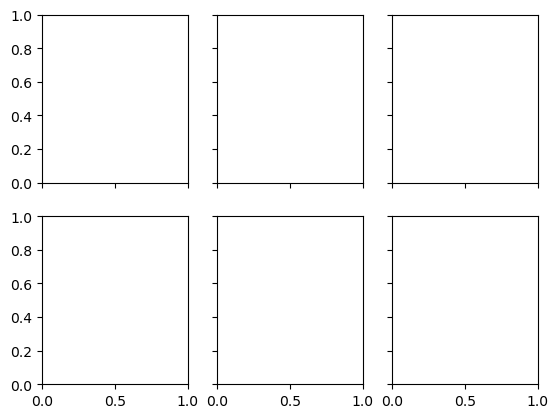

In [29]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

## plt.GridSpec: More Complicated Arrangements
***A `GridSpec` for a grid of two rows and three columns with some specified width and height space.***

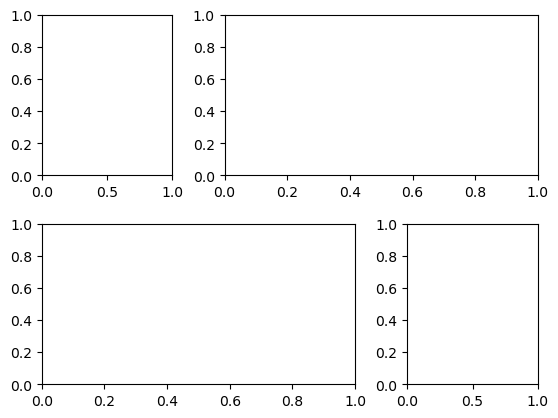

In [30]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

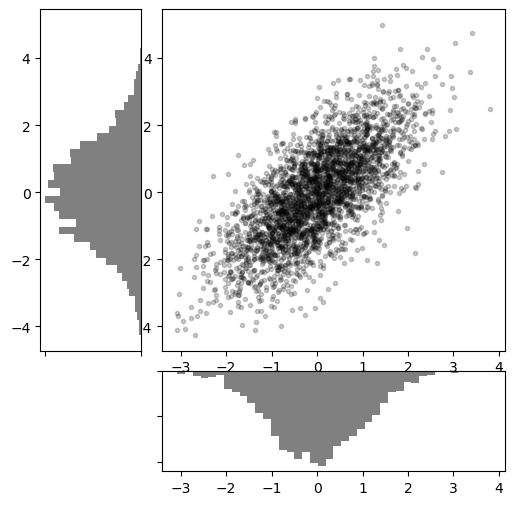

In [31]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
rng = np.random.default_rng(1701)
x, y = rng.multivariate_normal(mean, cov, 3000).T

# Set up the axes with GridSpec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# Scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# Histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()